# Inventur der Seattle Public Library 

#### Die Fragen, die in diesem Notebook beantworten werden sind:
1. Von welchem Itemtype wurden die meisten Bücher inventarisiert?
2. In welchem Jahr wurden die meisten Bücher publiziert?
3. Zu welchem Itemtype gehören die meisten floatingitems?
4. Wie viele inventarisierten Bücher gehören zum floatingitem?
5. Wie viele Exemplare von einem Buch sind vorhanden?

In [88]:
#zuerst werden zwei Dictionaries um die csv Datei lesen zu können, importiert
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv?$limit=10000"
inventory_file ="inventory.csv"

In [75]:
# Download der Daten
urllib.request.urlretrieve(url, inventory_file)

('inventory.csv', <http.client.HTTPMessage at 0x1e9c84ccec8>)

In [89]:
# DF geschpeichert als inventories
inventories=pd.read_csv(inventory_file)

In [90]:
inventories

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3125374,"Crossed + one hundred. Vol. 1 / Alan Moore, st...","Moore, Alan, 1953-","1592912648, 9781592912643",2015.,"Avatar Press,","Good and evil Comic books strips etc, Graphic ...",acbk,nacomic,NaN,dth,2017-09-01T00:00:00.000,1
9996,3139221,Swamp man / Donald Goines.,"Goines, Donald, 1937-1974","0870679473, 9780870679476","2008, ©1974.","Kensington Publishing Corp,","African American men Mississippi Fiction, Reve...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,2
9997,586701,The Raffi singable songbook [music] : a collec...,Raffi,0517566370,"[1987], c1980.","Crown Publishers,","Childrens songs, Songs",acmus,camus,NaN,cen,2017-09-01T00:00:00.000,1
9998,3125408,Cop car [videorecording] / Focus World ; Audax...,NaN,NaN,[2015],"Universal,","Sheriffs Drama, Teenage boys Drama, Police veh...",acdvd,nadvd,Floating,glk,2017-09-01T00:00:00.000,1


In [91]:
#Spalte Itemtype ziehen
inventories["itemtype"]

0        jcbk
1        acbk
2        acbk
3        acbk
4        acbk
        ...  
9995     acbk
9996     acbk
9997    acmus
9998    acdvd
9999     acbk
Name: itemtype, Length: 10000, dtype: object

In [92]:
inventories["itemtype"].value_counts()[:10]
#Antwort Frage 1: Von dem Itemtype acbk wurden die meisten Bücher inventarisiert(4974)

acbk     4974
jcbk     2374
arbk      852
accd      730
acdvd     637
jcdvd     188
acmus     120
jccd       97
arper       8
acmap       6
Name: itemtype, dtype: int64

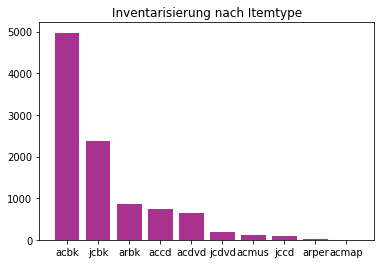

<Figure size 432x288 with 0 Axes>

In [144]:
Itemtype = ["acbk", "jcbk", "arbk", "accd", "acdvd", "jcdvd", "acmus", "jccd", "arper", "acmap"]
Anzahl = [4974, 2374, 852, 730, 637, 188, 120, 97, 8, 6]
plt.title ("Inventarisierung nach Itemtype")
plt.bar (Itemtype, Anzahl, color=("#a8328f"))
plt.figure(figsize=(6,4))
plt.show()

In [14]:
inventories["publicationyear"].describe()
#Antwort Frage #2: Die meisten Bücher wurden im [2016] publiziert(579)

count       9883
unique       915
top       [2016]
freq         579
Name: publicationyear, dtype: object

In [111]:
inventories["publicationyear"].value_counts()[:10]

[2016]    579
[2015]    495
2016.     468
2015.     371
2014.     327
[2017]    325
[2014]    325
2013.     308
2012.     264
2011.     258
Name: publicationyear, dtype: int64

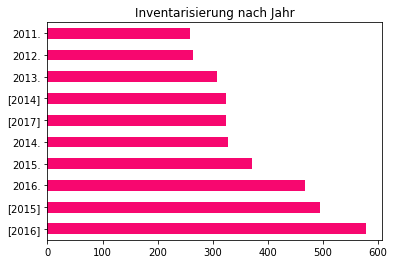

In [145]:
plt.title ("Inventarisierung nach Jahr")
inventories["publicationyear"].value_counts()[:10].plot(kind="barh", color="#f7076f")
plt.show()

In [16]:
pd.crosstab(inventories["itemtype"], inventories["floatingitem"])
#Antwort Frage #3: die meisten Floatingitems Bücher gehören zu der Kategorie acdvd 

floatingitem,Floating
itemtype,
acbk,228
accd,443
acdvd,520
jcbk,133
jccd,65
jcdvd,162


In [17]:
#Alle Werte der vorherigen Tabelle adieren um die Antwort auf die Frage #4 zu bekommen
pd.crosstab(inventories["itemtype"], inventories["floatingitem"]).sum()
# Antwort Frage #4: 1551 inventarisierten Bücher gehören zum floatingitem

floatingitem
Floating    1551
dtype: int64

In [134]:
inventories["itemcount"].value_counts()
#Antwort Frage 5: es gibt von 1 bis 140 Exemplare von einem Buch. Aber die meisten haben nur Exemplar.

1      8788
2       974
3       125
4        40
5        14
6        13
9         7
10        7
7         7
8         6
11        2
13        2
40        1
17        1
18        1
26        1
15        1
19        1
20        1
28        1
140       1
21        1
29        1
53        1
22        1
54        1
12        1
Name: itemcount, dtype: int64

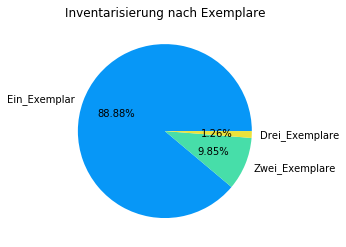

In [146]:
Ein_Exemplar= inventories.loc[inventories["itemcount"] ==1].count()[0]
Zwei_Exemplare=inventories.loc[inventories["itemcount"] ==2].count()[0]
Drei_Exemplare=inventories.loc[inventories["itemcount"] ==3].count()[0]
plt.title ("Inventarisierung nach Exemplare")

labels = ["Ein_Exemplar", "Zwei_Exemplare", "Drei_Exemplare"]
colors=["#0797f7", "#47dea9", "#ebe23b"]

plt.pie([Ein_Exemplar, Zwei_Exemplare, Drei_Exemplare], labels=labels, colors=colors, autopct="%.2f%%")
plt.show()